In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_heart = pd.read_csv("heart.csv")

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df_heart.iloc[:, :13]
y = df_heart.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
#Standardizasyon

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
#ward bağlantı yöntemi:

In [6]:
#yıgınsal kümelemenin tanımlanması:

agg_küme_ward = AgglomerativeClustering(linkage = "ward",affinity = "euclidean", n_clusters = 2)

# Modeli Fit Etmek
kümeler_ward = agg_küme_ward.fit_predict(X_std)

In [7]:
#complete bağlantı yöntemi:

In [8]:
agg_küme_complete = AgglomerativeClustering(linkage="complete",affinity="manhattan",n_clusters=2)

kümeler_comp = agg_küme_complete.fit_predict(X_std)

In [9]:
#average bağlantı yöntemi:

In [10]:
agg_küme_avg = AgglomerativeClustering(linkage="average",affinity="cosine",n_clusters=2)

kümeler_avg = agg_küme_avg.fit_predict(X_std)

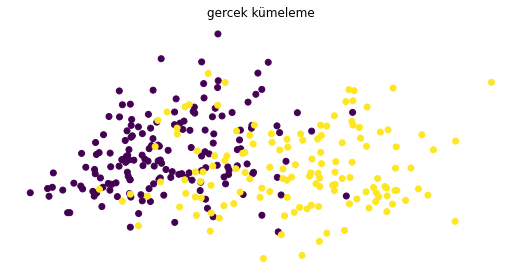

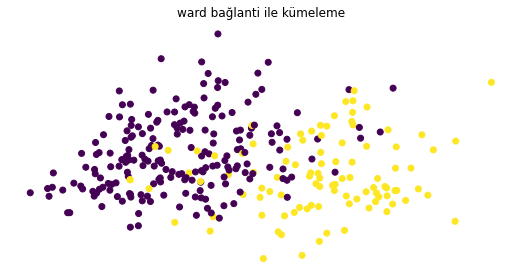

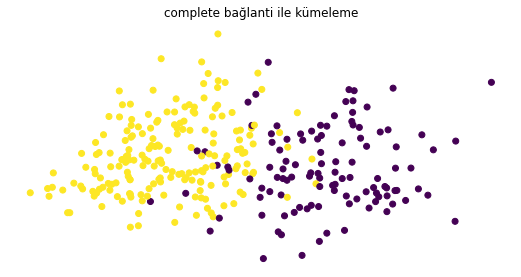

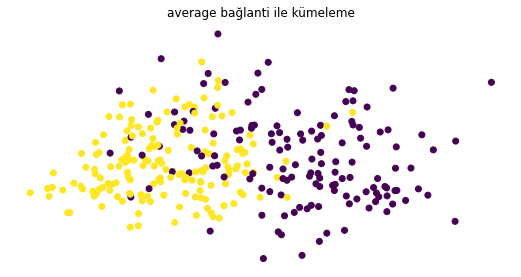

In [11]:
kümeler  = [y,kümeler_ward,kümeler_comp,kümeler_avg]
kümeler1 = ["gercek kümeleme","ward bağlanti ile kümeleme","complete bağlanti ile kümeleme","average bağlanti ile kümeleme"]
pca = PCA(n_components=2).fit_transform(X_std)

for i in range(0,4):
    
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,i+1)
    plt.scatter(pca.T[0],pca.T[1],c=kümeler[i])
    plt.title('{}'.format(kümeler1[i]))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

    plt.show()

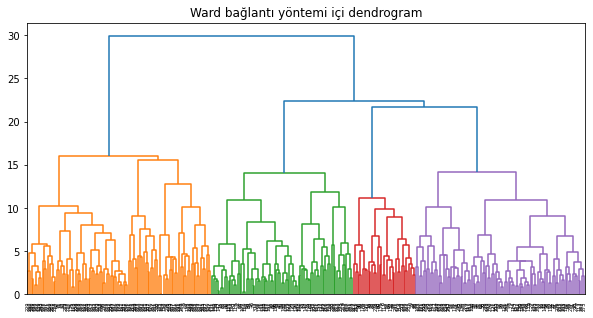

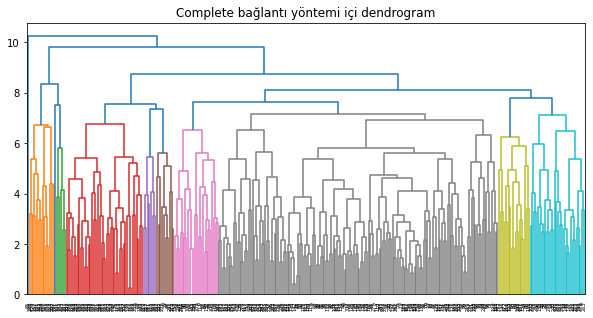

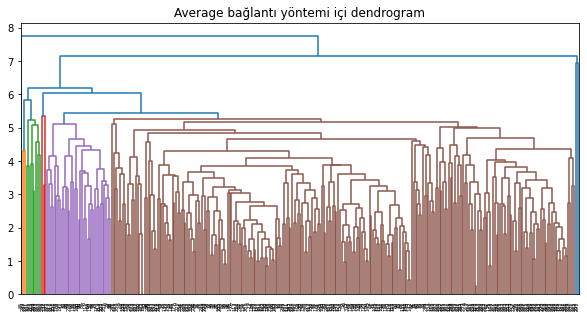

In [13]:

plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method='ward'))
plt.title("Ward bağlantı yöntemi içi dendrogram")
plt.show()

plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method='complete'))
plt.title("Complete bağlantı yöntemi içi dendrogram")
plt.show()


plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method='average'))
plt.title("Average bağlantı yöntemi içi dendrogram")
plt.show()

In [14]:
#siluet katsayısı ile kümelerin birbirinden ne kadar farklı olduğunu bulmuş oluruz. 
#+1 ile -1 arasında oluşan değer +1’e ne kadar yakın olursa cluster sayısının o kadar iyi olduğunu teyit ederiz. 
#Kümelerin kendi içlerindeki ve kümelerin kendi aralarındaki ortalama uzaklık arasında oluşturulan denklem ile bu değer bulunur.



for i,j,k in zip([kümeler_ward,kümeler_comp,kümeler_avg],["euclidean","cosine","cosine"],["Ward","Complete","Average"]):

    print("{} Bağlantı Yöntemi için Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}".format(k,
        metrics.adjusted_rand_score(y, i)))
    print("{} bağlantı yöntemi için Siluet degeri: {}".format(k,
        metrics.silhouette_score(X_std, i, metric=j)),'\n')

Ward Bağlantı Yöntemi için Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.2454680392170414
Ward bağlantı yöntemi için Siluet degeri: 0.1325316617259095 

Complete Bağlantı Yöntemi için Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.3388492364931911
Complete bağlantı yöntemi için Siluet degeri: 0.23014630728547703 

Average Bağlantı Yöntemi için Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.20782425775288046
Average bağlantı yöntemi için Siluet degeri: 0.20312403307835897 



In [15]:
kümeler_kmeans = KMeans(n_clusters=2,random_state=123).fit_predict(X_std)

In [16]:
print("Kmeans Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler_kmeans)))
print("Kmeans Kümeleme için Siluet Katsayısı: {}"
      .format(metrics.silhouette_score(X_std, kümeler_kmeans, metric='cosine')))

Kmeans Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.3951165387976023
Kmeans Kümeleme için Siluet Katsayısı: 0.25492129541848046
